In [1]:
from matplotlib import pyplot as plt
import numpy as np
#TODO make separate notebooks for each system

In [2]:
# # #uncomment this block for HeH+
# sys = 'heh+'
# c0hf = 0.9625707
# c1hf = -0.13322676E-14 
# c2hf = -0.2691179
# c3hf = 0.0321435

# c2b1b0 = 0.1903932
# c2b1b1 = 0.70710678
# c2b1b2 = 0.6809922 
# c2b1b3 = 0.0000088

# c2a1a0 = c2b1b0
# c2a1a1 = -0.70710678 
# c2a1a2 = c2b1b2
# c2a1a3 = c2b1b3

# c22110 = -0.0309597 
# c22111 = 0.57112365E-16
# c22112 = 0.0086428
# c22113 = 0.9994833

In [3]:
#uncomment this block for HeH+
sys = 'heh+'
c0hf = 0.9625707
c1hf = -0.2691179
c2hf = 0.0321435
c2b1b0 = 0.1903932
c2b1b1 = 0.6809922 
c2b1b2 = 0.0000088
c2a1a0 = c2b1b0
c2a1a1 = c2b1b1
c2a1a2 = c2b1b2
c22110 = -0.0309597 
c22111 = 0.0086428
c22112 = 0.999483

In [4]:
# #uncomment this block for H2
# sys = 'h2'
# c0hf = 0.99364675
# c1hf = 0.66613381E-15
# c2hf = 0.11254389

# c2b1b0 = -0.21448983E-15
# c2b1b1 = 0.70710678 
# c2b1b2 = -0.93431708E-16

# c2a1a0 = 0.11102230E-14
# c2a1a1 = 0.70710678
# c2a1a2 = -0.18041124E-15

# c22110 = -0.11254389 
# c22111 =  0.26197948E-15
# c22112 = 0.99364675  

In [ ]:
# #form basis and dictionary of CI coefficients
# phi1 = np.array([1,0]).reshape((2,1))
# phi2 = np.array([0, 1]).reshape((2,1))
# chf = {0: c0hf, 1: c1hf, 2:  c2hf, 3: c3hf }
# c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2, 3:c2b1b3 }
# c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2, 3: c2a1a3}
# c2211 = {0: c22110, 1: c22111, 2:  c22112, 3: c22113}

In [5]:
#form basis and dictionary of CI coefficients
phi1 = np.array([1,0]).reshape((2,1))
phi2 = np.array([0, 1]).reshape((2,1))
chf = {0: c0hf, 1: c1hf, 2:  c2hf}
c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2}
c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2}
c2211 = {0: c22110, 1: c22111, 2:  c22112}

In [6]:
#this loads in the AO basis data saved to disk from Gaussian
# tran_den_mat = {}
# for i in range(0,3):
#     for j in range(i,3):
#         tran_den_mat[str(i)+str(j)] = np.load('denmat_ci/dens_ci_'+str(i)+'_'+str(j)+'_AO.npz')['arr_0']
# tran_den_mat['10'] = tran_den_mat['01']
# tran_den_mat['20'] = tran_den_mat['02']
# tran_den_mat['21'] = tran_den_mat['12']
# tran_den_mat

In [8]:
tens = np.zeros((3,3,2,2))
for i in range(0,3):
    for j in range(0,3):
        tens [i,j,:,:] = 2 * (chf[i]*chf[j] *(phi1 @phi1.T) + (1/2)*c2a1a[i]*c2a1a[j]*(phi1 @phi1.T + phi2 @phi2.T) 
                                           +(1/2) * c2b1b[i]*c2b1b[j]*(phi1 @phi1.T + phi2 @phi2.T) + c2211[i]*c2211[j]*(phi2 @phi2.T)
                                          +(1/2) * (chf[i]*c2a1a[j] * (phi1 @ phi2.T) + c2a1a[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (chf[i]*c2b1b[j] * (phi1 @ phi2.T) + c2b1b[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (c2a1a[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2a1a[j]*(phi2 @ phi1.T))
                                          +(1/2) * (c2b1b[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2b1b[j]*(phi2 @ phi1.T)))
        print('TRACE: ',np.trace(tens [i,j,:,:]),str(i)+str(j))
    
tens
#can compare this MO -> AO with saved Gaussian

TRACE:  1.99999999347012 00
TRACE:  -3.122922009879403e-08 01
TRACE:  9.676133999603209e-08 02
TRACE:  -3.122922009879403e-08 10
TRACE:  1.99999979002786 11
TRACE:  -1.4816705999620705e-07 12
TRACE:  9.676133999603209e-08 20
TRACE:  -1.4816705999620705e-07 21
TRACE:  1.9999989440722603 22


array([[[[ 1.92558385,  0.        ],
         [ 0.        ,  0.07441615]],

        [[-0.25877744,  0.        ],
         [ 0.        ,  0.25877741]],

        [[ 0.06188413,  0.        ],
         [ 0.        , -0.06188404]]],


       [[[-0.25877744,  0.        ],
         [ 0.        ,  0.25877741]],

        [[ 1.07234964,  0.        ],
         [ 0.        ,  0.92765015]],

        [[-0.0172888 ,  0.        ],
         [ 0.        ,  0.01728865]]],


       [[[ 0.06188413,  0.        ],
         [ 0.        , -0.06188404]],

        [[-0.0172888 ,  0.        ],
         [ 0.        ,  0.01728865]],

        [[ 0.00206641,  0.        ],
         [ 0.        ,  1.99793253]]]])

In [ ]:
# full_den_mats = np.load(sys+'/td_dens_tdcasscf_'+sys+'_sto-3g_046_dt=0.082680au.npz',allow_pickle=True)
# full_den_mats.files

In [ ]:
# full_den_mats = full_den_mats['td_dens_re_data'] + 1j*full_den_mats['td_dens_im_data']
# full_den_mats.shape

In [ ]:
# C = np.load('denmat_ci_H2/ke+en+overlap+ee_twoe+dip_casscf22_h2_sto-3g.npz')['cMO_colvec_data']
# S = np.load('denmat_ci_H2/ke+en+overlap+ee_twoe+dip_casscf22_h2_sto-3g.npz')['overlap_data']

In [9]:
time_coeffs = np.loadtxt(sys+'/time_coeffs.tdcasscf_'+sys+'_sto-3g_046_dt=0.082680au.txt',dtype=np.cdouble)
time_coeffs

array([[ 3.99987000e-03+0.0000000e+00j,  9.99999760e-01-3.7856000e-04j,
         0.00000000e+00+0.0000000e+00j,  2.46800000e-05+5.7388000e-04j,
         8.87000000e-06+9.0850000e-05j],
       [ 5.99980000e-03+0.0000000e+00j,  9.99997850e-01-1.1328400e-03j,
         0.00000000e+00+0.0000000e+00j,  1.23580000e-04+1.7132100e-03j,
         4.38900000e-05+2.6847000e-04j],
       [ 7.99973000e-03+0.0000000e+00j,  9.99991460e-01-2.2570800e-03j,
         0.00000000e+00+0.0000000e+00j,  3.45920000e-04+3.4011100e-03j,
         1.21080000e-04+5.2494000e-04j],
       ...,
       [ 4.01386611e+01+0.0000000e+00j,  9.69611870e-01+1.4482590e-02j,
         0.00000000e+00+0.0000000e+00j, -2.14118560e-01+1.1738910e-01j,
        -5.44890000e-04-3.9772500e-03j],
       [ 4.01406611e+01+0.0000000e+00j,  9.69611870e-01+1.4482590e-02j,
         0.00000000e+00+0.0000000e+00j, -2.03313010e-01+1.3524340e-01j,
        -1.30535000e-03-3.7962500e-03j],
       [ 4.01426610e+01+0.0000000e+00j,  9.69611870e-01+1.44825

In [10]:
#deletes time column 
time_coeffs = np.delete(time_coeffs,0,1)

In [11]:
#ensuring normalization
np.sum(np.square(np.abs(time_coeffs)),axis=1)

array([1.        , 1.00000001, 0.99999999, ..., 1.        , 1.        ,
       1.        ])

In [12]:
#deletes 0 coefficient column
time_coeffs2 = np.delete(time_coeffs,1,1)

[1.         1.00000001 0.99999999 ... 1.         1.         1.        ]


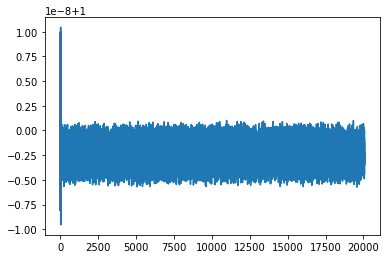

In [13]:
#ensuring normalization
print(np.sum(np.abs(np.square(time_coeffs2)),axis=1))
plt.plot(np.arange(0,time_coeffs2.shape[0]),np.sum(np.abs(np.square(time_coeffs2)),axis=1));

In [16]:
rdmMO = np.einsum('ni,nj,ijab->nab',time_coeffs2, np.conjugate(time_coeffs2), tens)
rdmMO.shape

(20071, 2, 2)

C:\Users\Hardeep\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


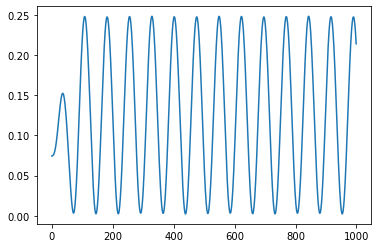

In [27]:
d22 = rdmMO[:1000,1,1]
plt.plot(d22)

In [ ]:
# trajs = []
# for _ in range(100):
#     vals = []
#     for i in range(time_coeffs2.shape[0]):
#         x = np.random.normal(size=4) + 1j*np.random.normal(size=4)
#         x /= np.sqrt(np.sum(np.abs(x)**2))
#         vals.append(x)
#     vals = np.array(vals)
#     time_coeffs2 = vals
#     #print(np.max((np.sum(np.abs(np.square(vals)),axis=1))), np.min((np.sum(np.abs(np.square(vals)),axis=1))))
#     #this is the training data for MMUT ()
    
#     #print(rdmMO.shape)
#     trajs.append(rdmMO)
# trajs = np.array(trajs)
# trajs[0]

In [ ]:
with open('tdci_training_data.npy', 'wb') as f:
    np.save(f, trajs)

In [ ]:
np.load('tdci_training_data.npy').shape

In [ ]:
for i in range(trajs.shape[0]):
    traces = np.einsum('ijj ->i',trajs[i])
    print(np.max(traces),np.min(traces))
#plt.plot(np.arange(0,time_coeffs2.shape[0]),traces);